In [ ]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [ ]:
df1=pd.read_csv('aquafarm_water_parameters_data.csv',encoding="ISO-8859-1")
df1.fillna(0, inplace=True)
df1

,sno,Temperature,pH,Turbidity,Water_quality
0,0,20.99,7.81,197,Good
1,1,20.99,7.81,197,Good
2,2,20.98,7.81,197,Good
3,3,20.98,7.81,197,Good
4,4,20.98,7.81,197,Good
...,...,...,...,...,...
9618,9618,21.32,7.49,212,Good
9619,9619,21.32,7.49,212,Good
9620,9620,21.34,7.49,212,Good
9621,9621,21.34,7.50,212,Good


In [ ]:
# Explore data

#df = pd.read_csv(io.StringIO(uploaded['candy-data.csv'].decode('utf-8')))
#df = df[['Temp','ph','Turb','Wq']] 	
df1=df1[['sno','Temperature','pH','Turbidity','Water_quality']]
df1.head()

,sno,Temperature,pH,Turbidity,Water_quality
0,0,20.99,7.81,197,Good
1,1,20.99,7.81,197,Good
2,2,20.98,7.81,197,Good
3,3,20.98,7.81,197,Good
4,4,20.98,7.81,197,Good


In [ ]:
df=df1.replace({'Water_quality' : { 'Good' : 1, 'Bad' : 0}})

In [ ]:
df

,sno,Temperature,pH,Turbidity,Water_quality
0,0,20.99,7.81,197,1
1,1,20.99,7.81,197,1
2,2,20.98,7.81,197,1
3,3,20.98,7.81,197,1
4,4,20.98,7.81,197,1
...,...,...,...,...,...
9618,9618,21.32,7.49,212,1
9619,9619,21.32,7.49,212,1
9620,9620,21.34,7.49,212,1
9621,9621,21.34,7.50,212,1


In [ ]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

In [ ]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

#Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()


In [ ]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['Temperature','pH','Turbidity']] 	

y_train = train_df["Water_quality"]

X_test = test_df[['Temperature','pH','Turbidity']] 
y_test = test_df["Water_quality"]



In [ ]:

len(y_test)

1925

In [ ]:
len(X_test)

1925

In [ ]:
len(X_train)

7698

In [ ]:
len(y_train)

7698

In [ ]:
X_test

,Temperature,pH,Turbidity
9022,15.61,5.92,212
4960,18.26,8.31,198
5683,22.52,7.28,202
7754,22.70,7.51,259
6318,17.68,7.30,270
...,...,...,...
3085,19.50,8.42,218
5957,20.89,7.93,213
8732,17.26,7.14,220
3367,16.10,8.24,215


In [ ]:
x1_test = [[10,10,245]] 

In [ ]:
#y1_test=[1]

### Data Exploration

In [ ]:
y_train.value_counts()

1    6596
0    1102
Name: Water_quality, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


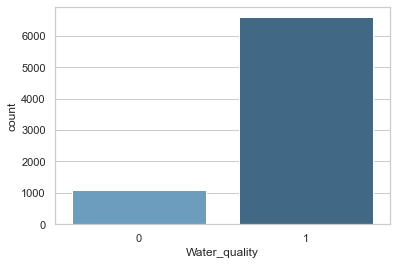

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot("Water_quality", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_choc = len(train_df[train_df['Water_quality']==0])
count_choc = len(train_df[train_df['Water_quality']==1])


pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of bad water quality is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of good water quality", pct_of_choc*100)


percentage of bad water quality is 14.315406599116653
percentage of good water quality 85.68459340088334


In [ ]:
train_df

,sno,Temperature,pH,Turbidity,Water_quality
3113,3113,19.26,8.40,218,1
7936,7936,23.31,8.19,247,1
484,484,31.40,8.25,195,1
6202,6202,19.24,6.98,225,1
2224,2224,22.60,7.24,212,1
...,...,...,...,...,...
8819,8819,16.81,5.77,260,0
3096,3096,19.41,8.42,218,1
4958,4958,18.23,8.31,198,1
3045,3045,19.73,10.10,218,1


In [ ]:
train_df.groupby('Water_quality').mean()

,sno,Temperature,pH,Turbidity
Water_quality,,,,
0,6163.839383,18.267142,7.763367,240.172414
1,4585.223469,20.501163,7.861339,217.217404


### Model Development and Prediction
Import the Scikit Learn Logistic Regression module 
Fit model on the train set using fit() then perform prediction on test set using prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
y1_pred = logreg.predict(x1_test)
if(y1_pred[0]==1):
    print("The water_quality is good")
else:
    print("The water_quality is bad")

The water_quality is bad


In [ ]:
y1_pred

array([0], dtype=int64)

### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 107,  163],
       [  29, 1626]], dtype=int64)

### Visualize CFM (confusion matrix) using a heatmap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

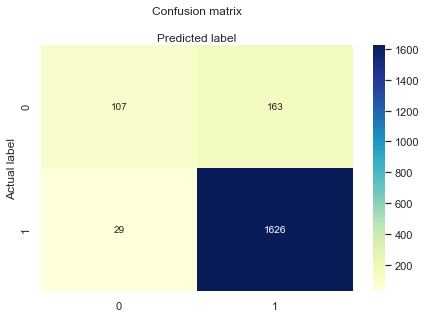

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### CFM evaluation metrics Accuracy, Precision, Recall

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9002597402597402
Precision: 0.9088876467300168
Recall: 0.9824773413897281


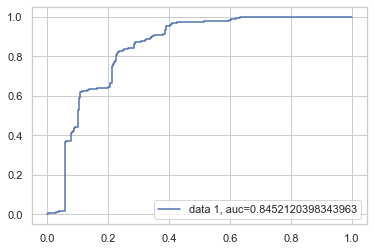

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()